## Load data

In [1]:
from LoadSplitData import Process
import numpy as np
np.random.seed(0)

Using TensorFlow backend.


In [2]:
data = Process()
data.split_data()

Images shape (24076, 80, 80, 3), label shape (24076,), ratio of authorized data 0.4503655092208008
X_train shape: (12639, 80, 80, 3)
12639 train samples
5418 valid samples
6019 test samples


## Train the model

In [3]:
from TuneModel import Model

In [4]:
FILE_PATH = r'C:\Users\dbsnail\ImageProject\models\tune_ml' #_sgd.h5'

batch_sizes = [40, 50, 60, 70, 80 ,90]
optimizers = ['adam', 'sgd']
model_dict = {}
for optimizer in optimizers:
    for batch_size in batch_sizes:

        file_path = FILE_PATH + '_' + str(batch_size) + '_' + optimizer + '_' + 'adam.h5'
        model = Model(batch_size)
        model.build_model(data)
        model.train(data, optimizer)
        model.save(file_path)
        acc = model.evaluate(data)
        print("Metric: {}, batch_size: {}, evaluate value: {}".format(optimizer, batch_size, acc))
        batch_size_acc = (batch_size, acc) 
        if optimizer in model_dict.keys():
            model_dict[optimizer].append(batch_size_acc)
        else:
            model_dict[optimizer] = [batch_size_acc]  


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 80, 80, 32)    896         convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 80, 80, 32)    9248        convolution2d_1[0][0]            
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 40, 40, 32)    0           convolution2d_2[0][0]            
____________________________________________________________________________________________________
dropout_1 (Dropout)              (None, 40, 40, 32)    0           maxpooling2d_1[0][0]             
___________________________________________________________________________________________

## Plot the prediction result

In [8]:
import pandas as pd
import json
with open('model_matric.txt', 'w') as outfile:
    json.dumps(model_dict, outfile) 
model_acc = pd.DataFrame(model_dict)
model_acc['batch_size'] = model_acc.adam.map(lambda x: x[0])
model_acc['adam'] = model_acc.adam.map(lambda x: x[1])
model_acc['sgd'] = model_acc.sgd.map(lambda x: x[1])
model_acc

,adam,sgd,batch_size
0,99.651105,98.504734,40
1,99.634491,97.208839,50
2,99.368667,83.302879,60
3,99.252368,97.325138,70
4,99.003156,92.208009,80
5,99.750790,96.145542,90


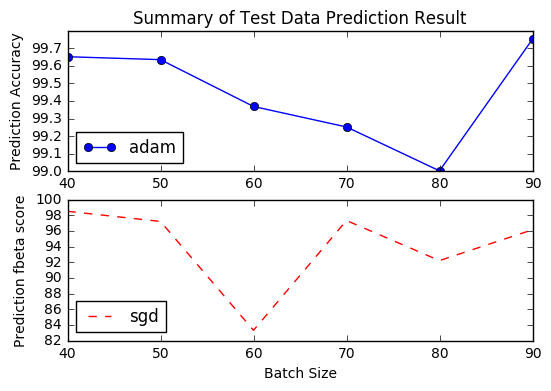

In [10]:
import matplotlib.pyplot as plt

plt.figure()
plt.subplot(2,1,1)
plt.plot(model_acc.batch_size, model_acc.adam, '-o', label = 'adam')
plt.title("Summary of Test Data Prediction Result")
plt.ylabel("Prediction Accuracy")
plt.legend(loc=3)

plt.subplot(2,1,2)
plt.plot(model_acc.batch_size, model_acc.sgd, '--r', label = 'sgd')
plt.xlabel("Batch Size")
plt.ylabel("Prediction fbeta score")
plt.legend(loc=3)
plt.savefig('metrics_filter.png')
plt.show()